In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/unbreakable-bonds/"
print("data path: ", data_path)

level: level1 & tutorial name: breaking-a-carbon-nanotube
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/breaking-a-carbon-nanotube/unbreakable-bonds/


In [3]:
log = lammps_logfile.File(data_path + "log.lammps")
time_0 = log.get("Step", run_num=0)
energy_0 = log.get("TotEng", run_num=0) # Kcal/mol
time_1 = log.get("Step", run_num=1)
energy_1 = log.get("TotEng", run_num=1) # Kcal/mol
time_0 /= 1000 # ps
time_1 /= 1000 # ps

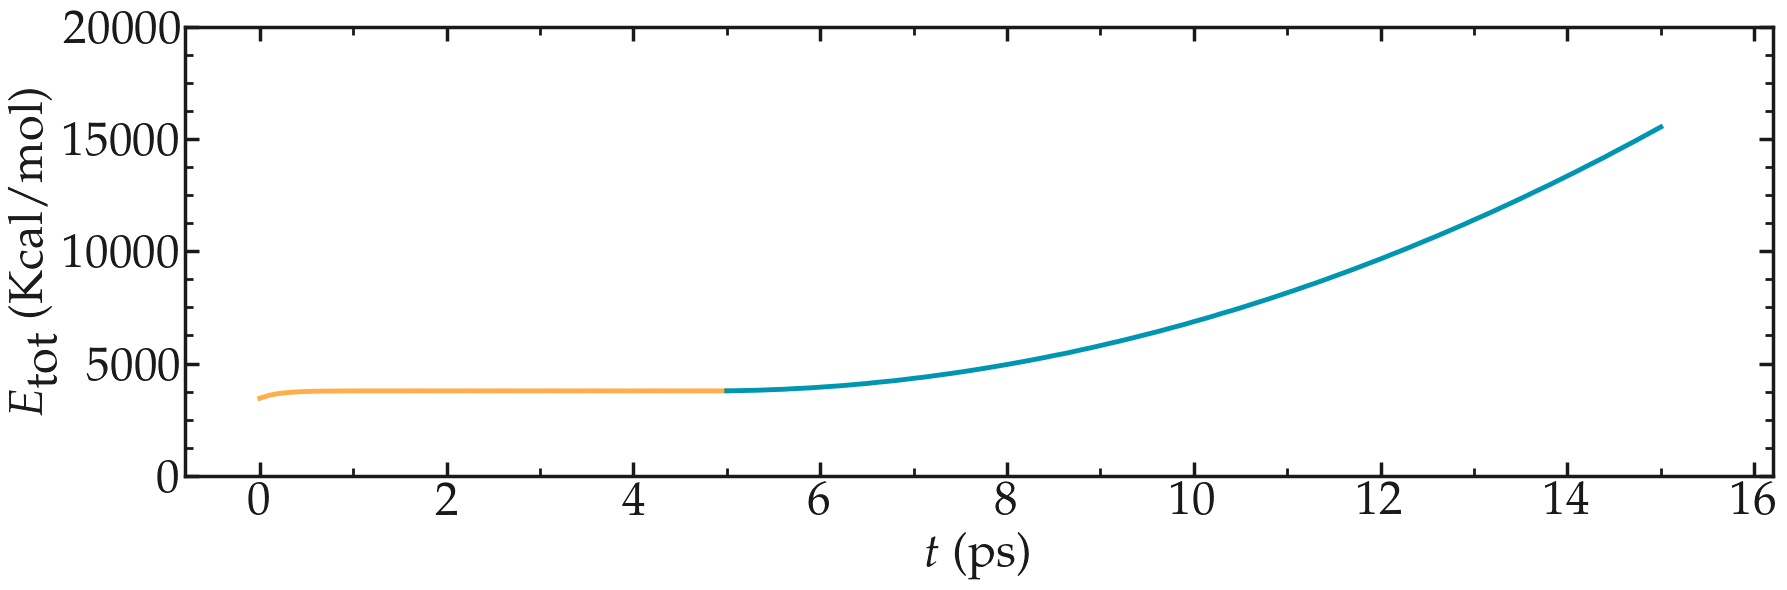

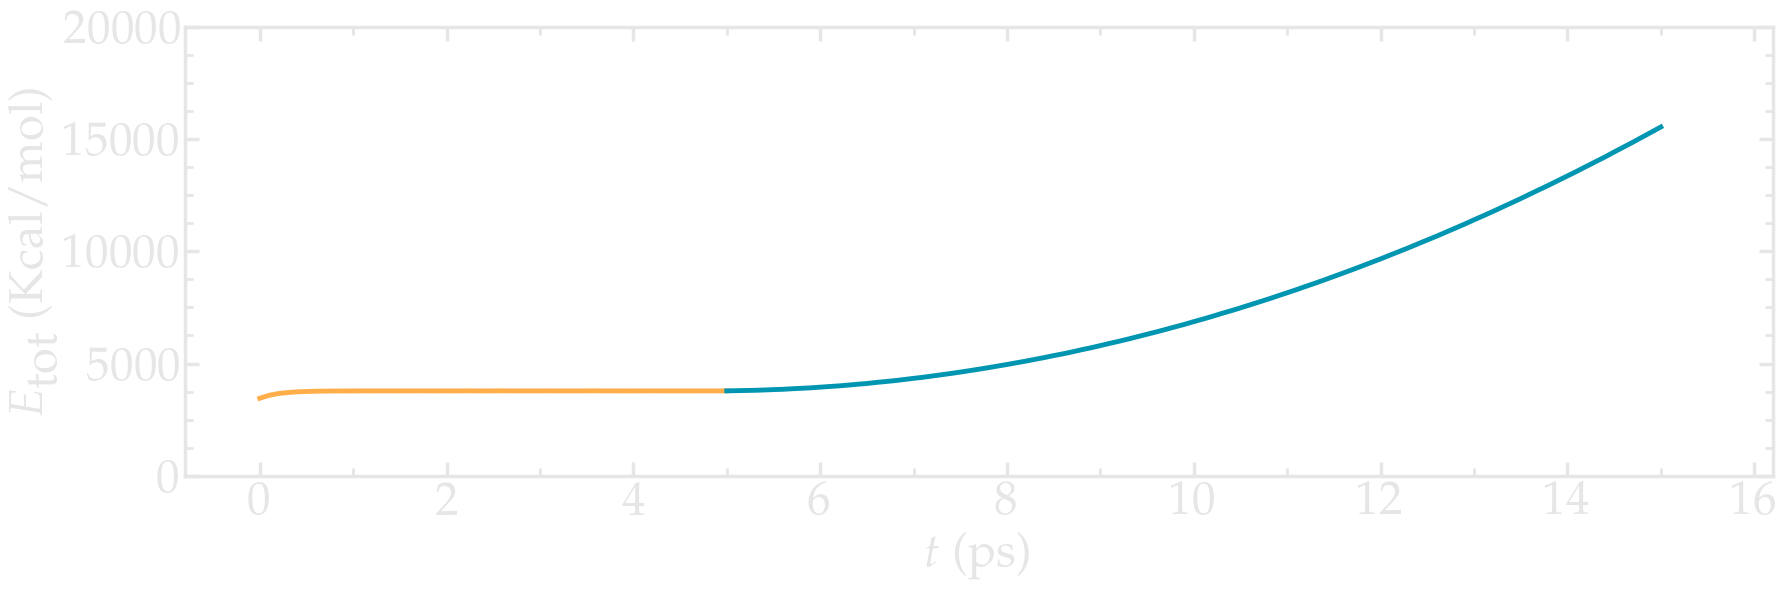

In [7]:
filename = "energy-unbreakable"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time_0, energy_0, color=colors["myorange"], linewidth=3.5)
    ax[-1].plot(time_1, energy_1, color=colors["myblue"], linewidth=3.5)
    complete_panel(ax[-1], r'$t$ (ps)', r'$E_\textrm{tot}$ (Kcal/mol)', legend=False, axis_color=mygray, locator_y=4)
    set_boundaries(plt, x_ticks=np.arange(0, 18, 2), y_ticks=np.arange(0, 25000, 5000),
                   x_boundaries=(-0.8, 16.2), y_boundaries=(0, 20000))
    save_figure(plt, fig, mode, git_path, path_figures, filename)